In [3]:
#Importing Required Number of Libraries
#Importing Required Libraries
#_______________________________________________________________________________________________________________
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphs
#_______________________________________________________________________________________________________________
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Change column display number during print
pd.set_option('display.max_columns', 500)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix,precision_score,f1_score
import itertools
from sklearn.model_selection import GridSearchCV, cross_val_score ,RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [4]:
path='./new_train.csv'
path1='./new_test.csv'

In [5]:
train=pd.read_csv(path)
train

,Unnamed: 0,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Home_Owner_Mortgage,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent,Purpose_Of_Loan_car,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_debt_consolidation,Purpose_Of_Loan_educational,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding
0,0,10000001.00,7000.00,1.00,68000.00,0.00,18.37,0.00,37.75,9.00,14.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1,10000002.00,30000.00,0.00,107365.58,1.00,14.93,0.00,17.00,12.00,24.00,0.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2,10000003.00,24725.00,7.00,75566.40,1.00,15.88,0.00,32.55,12.00,16.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,3,10000004.00,16000.00,1.00,56160.00,1.00,14.34,3.00,35.42,16.00,22.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,4,10000005.00,17000.00,8.00,96000.00,1.00,22.17,1.00,35.88,19.00,30.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,164304,10164305.00,20725.00,11.00,86838.63,1.00,13.56,0.00,35.52,13.00,16.00,1.00,2.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
164305,164305,10164306.00,6000.00,8.00,75998.40,1.00,9.12,0.00,36.00,13.00,30.00,1.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
164306,164306,10164307.00,20250.00,11.00,104658.38,1.00,18.17,1.00,34.74,17.00,30.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
164307,164307,10164308.00,10000.00,0.00,78871.67,0.00,18.75,1.00,48.00,16.00,62.00,0.00,3.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [6]:
test=pd.read_csv(path1)
test

,Unnamed: 0,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Home_Owner_Mortgage,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent,Purpose_Of_Loan_car,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_debt_consolidation,Purpose_Of_Loan_educational,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding
0,0,10164310.00,27500.00,11.00,129000.00,1.00,12.87,0.00,68.00,10.00,37.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1,10164311.00,26000.00,11.00,110000.00,0.00,11.37,0.00,33.15,6.00,23.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2,10164312.00,6075.00,1.00,75000.00,1.00,6.83,2.00,37.32,5.00,20.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,3,10164313.00,12000.00,11.00,73000.00,0.00,7.76,0.00,34.08,6.00,8.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,4,10164314.00,35000.00,1.00,156000.00,0.00,9.62,0.00,26.00,9.00,21.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109536,109536,10273846.00,15000.00,9.00,120000.00,1.00,8.15,2.00,32.00,13.00,57.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
109537,109537,10273847.00,9600.00,11.00,125000.00,0.00,9.08,1.00,17.00,9.00,34.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
109538,109538,10273848.00,2000.00,5.00,37850.00,0.00,11.60,0.00,36.65,10.00,11.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
109539,109539,10273849.00,2125.00,6.00,30000.00,0.00,24.88,0.00,37.50,5.00,6.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00


In [7]:
def class_imbalance(target):
    class_values = (target.value_counts()/target.value_counts().sum())*100
    return class_values

class_imbalance(train['Interest_Rate'])

2.00   42.96
3.00   36.47
1.00   20.57
Name: Interest_Rate, dtype: float64

In [8]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [9]:
#target encoding
from sklearn.model_selection import StratifiedKFold

X=train.drop('Interest_Rate',1)
y=train['Interest_Rate']
Xt=test
skf=StratifiedKFold()

import category_encoders as cat_encs
smoothing=0.3
cat_feat_to_encode =['Gender','Income_Verified','Inquiries_Last_6Mo']

enc_x = np.zeros(X[cat_feat_to_encode].shape)

for tr_idx, oof_idx in skf.split(X, y):
    encoder = cat_encs.TargetEncoder(cols=cat_feat_to_encode, smoothing=smoothing)
    
    encoder.fit(X[cat_feat_to_encode].iloc[tr_idx], y[tr_idx])
    enc_x[oof_idx, :] = encoder.transform(X[cat_feat_to_encode].iloc[oof_idx], y[oof_idx])
    
encoder.fit(X[cat_feat_to_encode], y)
enc_xt = encoder.transform(Xt[cat_feat_to_encode]).values


for idx, new_var in enumerate(cat_feat_to_encode):
    new_var = new_var + '_enc'
    X[new_var] = enc_x[:,idx]
    Xt[new_var] = enc_xt[:, idx]

TargetEncoder(cols=['Gender', 'Income_Verified', 'Inquiries_Last_6Mo'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='value', min_samples_leaf=1, return_df=True,
              smoothing=0.3, verbose=0)

TargetEncoder(cols=['Gender', 'Income_Verified', 'Inquiries_Last_6Mo'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='value', min_samples_leaf=1, return_df=True,
              smoothing=0.3, verbose=0)

TargetEncoder(cols=['Gender', 'Income_Verified', 'Inquiries_Last_6Mo'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='value', min_samples_leaf=1, return_df=True,
              smoothing=0.3, verbose=0)

TargetEncoder(cols=['Gender', 'Income_Verified', 'Inquiries_Last_6Mo'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='value', min_samples_leaf=1, return_df=True,
              smoothing=0.3, verbose=0)

TargetEncoder(cols=['Gender', 'Income_Verified', 'Inquiries_Last_6Mo'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='value', min_samples_leaf=1, return_df=True,
              smoothing=0.3, verbose=0)

TargetEncoder(cols=['Gender', 'Income_Verified', 'Inquiries_Last_6Mo'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='value', min_samples_leaf=1, return_df=True,
              smoothing=0.3, verbose=0)

In [10]:
X

,Unnamed: 0,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Home_Owner_Mortgage,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent,Purpose_Of_Loan_car,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_debt_consolidation,Purpose_Of_Loan_educational,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_enc,Income_Verified_enc,Inquiries_Last_6Mo_enc
0,0,10000001.00,7000.00,1.00,68000.00,0.00,18.37,0.00,37.75,9.00,14.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,1.94,2.03
1,1,10000002.00,30000.00,0.00,107365.58,1.00,14.93,0.00,17.00,12.00,24.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,2.26,2.03
2,2,10000003.00,24725.00,7.00,75566.40,1.00,15.88,0.00,32.55,12.00,16.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,2.26,2.03
3,3,10000004.00,16000.00,1.00,56160.00,1.00,14.34,3.00,35.42,16.00,22.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,2.26,2.43
4,4,10000005.00,17000.00,8.00,96000.00,1.00,22.17,1.00,35.88,19.00,30.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,2.26,2.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,164304,10164305.00,20725.00,11.00,86838.63,1.00,13.56,0.00,35.52,13.00,16.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,2.26,2.03
164305,164305,10164306.00,6000.00,8.00,75998.40,1.00,9.12,0.00,36.00,13.00,30.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,2.16,2.26,2.03
164306,164306,10164307.00,20250.00,11.00,104658.38,1.00,18.17,1.00,34.74,17.00,30.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,2.26,2.24
164307,164307,10164308.00,10000.00,0.00,78871.67,0.00,18.75,1.00,48.00,16.00,62.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,1.95,2.24


In [11]:
Xt

,Unnamed: 0,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Home_Owner_Mortgage,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent,Purpose_Of_Loan_car,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_debt_consolidation,Purpose_Of_Loan_educational,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_enc,Income_Verified_enc,Inquiries_Last_6Mo_enc
0,0,10164310.00,27500.00,11.00,129000.00,1.00,12.87,0.00,68.00,10.00,37.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,2.26,2.03
1,1,10164311.00,26000.00,11.00,110000.00,0.00,11.37,0.00,33.15,6.00,23.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,1.94,2.03
2,2,10164312.00,6075.00,1.00,75000.00,1.00,6.83,2.00,37.32,5.00,20.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,2.26,2.35
3,3,10164313.00,12000.00,11.00,73000.00,0.00,7.76,0.00,34.08,6.00,8.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,1.94,2.03
4,4,10164314.00,35000.00,1.00,156000.00,0.00,9.62,0.00,26.00,9.00,21.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,1.94,2.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109536,109536,10273846.00,15000.00,9.00,120000.00,1.00,8.15,2.00,32.00,13.00,57.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2.16,2.26,2.35
109537,109537,10273847.00,9600.00,11.00,125000.00,0.00,9.08,1.00,17.00,9.00,34.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,1.94,2.24
109538,109538,10273848.00,2000.00,5.00,37850.00,0.00,11.60,0.00,36.65,10.00,11.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,1.94,2.03
109539,109539,10273849.00,2125.00,6.00,30000.00,0.00,24.88,0.00,37.50,5.00,6.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2.16,1.94,2.03


In [13]:
#Frequency Encoding on train 
gen_fe=X.groupby('Gender').size()/len(X)

X['Gender_freq']=X['Gender'].map(gen_fe)

inc_fe=X.groupby('Income_Verified').size()/len(X)

X['income_freq']=X['Income_Verified'].map(inc_fe)

enq_fe=X.groupby('Inquiries_Last_6Mo').size()/len(X)

X['enq_freq']=X['Inquiries_Last_6Mo'].map(enq_fe)

#Frequency Encoding on test

gen_fe=Xt.groupby('Gender').size()/len(Xt)

Xt['Gender_freq']=Xt['Gender'].map(gen_fe)

inc_fe=Xt.groupby('Income_Verified').size()/len(Xt)

Xt['income_freq']=Xt['Income_Verified'].map(inc_fe)

enq_fe=Xt.groupby('Inquiries_Last_6Mo').size()/len(Xt)

Xt['enq_freq']=Xt['Inquiries_Last_6Mo'].map(enq_fe)


In [14]:
X

,Unnamed: 0,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Home_Owner_Mortgage,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent,Purpose_Of_Loan_car,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_debt_consolidation,Purpose_Of_Loan_educational,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_enc,Income_Verified_enc,Inquiries_Last_6Mo_enc,Gender_freq,income_freq,enq_freq
0,0,10000001.00,7000.00,1.00,68000.00,0.00,18.37,0.00,37.75,9.00,14.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,1.94,2.03,0.29,0.32,0.52
1,1,10000002.00,30000.00,0.00,107365.58,1.00,14.93,0.00,17.00,12.00,24.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,2.26,2.03,0.29,0.68,0.52
2,2,10000003.00,24725.00,7.00,75566.40,1.00,15.88,0.00,32.55,12.00,16.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,2.26,2.03,0.71,0.68,0.52
3,3,10000004.00,16000.00,1.00,56160.00,1.00,14.34,3.00,35.42,16.00,22.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,2.26,2.43,0.71,0.68,0.05
4,4,10000005.00,17000.00,8.00,96000.00,1.00,22.17,1.00,35.88,19.00,30.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,2.26,2.24,0.29,0.68,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,164304,10164305.00,20725.00,11.00,86838.63,1.00,13.56,0.00,35.52,13.00,16.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,2.26,2.03,0.71,0.68,0.52
164305,164305,10164306.00,6000.00,8.00,75998.40,1.00,9.12,0.00,36.00,13.00,30.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,2.16,2.26,2.03,0.71,0.68,0.52
164306,164306,10164307.00,20250.00,11.00,104658.38,1.00,18.17,1.00,34.74,17.00,30.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,2.26,2.24,0.71,0.68,0.28
164307,164307,10164308.00,10000.00,0.00,78871.67,0.00,18.75,1.00,48.00,16.00,62.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,1.95,2.24,0.29,0.32,0.28


In [15]:
Xt

,Unnamed: 0,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Home_Owner_Mortgage,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent,Purpose_Of_Loan_car,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_debt_consolidation,Purpose_Of_Loan_educational,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_enc,Income_Verified_enc,Inquiries_Last_6Mo_enc,Gender_freq,income_freq,enq_freq
0,0,10164310.00,27500.00,11.00,129000.00,1.00,12.87,0.00,68.00,10.00,37.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,2.26,2.03,0.71,0.36,0.52
1,1,10164311.00,26000.00,11.00,110000.00,0.00,11.37,0.00,33.15,6.00,23.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,1.94,2.03,0.71,0.64,0.52
2,2,10164312.00,6075.00,1.00,75000.00,1.00,6.83,2.00,37.32,5.00,20.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,2.26,2.35,0.71,0.36,0.13
3,3,10164313.00,12000.00,11.00,73000.00,0.00,7.76,0.00,34.08,6.00,8.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,1.94,2.03,0.71,0.64,0.52
4,4,10164314.00,35000.00,1.00,156000.00,0.00,9.62,0.00,26.00,9.00,21.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,1.94,2.03,0.71,0.64,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109536,109536,10273846.00,15000.00,9.00,120000.00,1.00,8.15,2.00,32.00,13.00,57.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2.16,2.26,2.35,0.71,0.36,0.13
109537,109537,10273847.00,9600.00,11.00,125000.00,0.00,9.08,1.00,17.00,9.00,34.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,1.94,2.24,0.71,0.64,0.28
109538,109538,10273848.00,2000.00,5.00,37850.00,0.00,11.60,0.00,36.65,10.00,11.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,1.94,2.03,0.71,0.64,0.52
109539,109539,10273849.00,2125.00,6.00,30000.00,0.00,24.88,0.00,37.50,5.00,6.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2.16,1.94,2.03,0.71,0.64,0.52


In [16]:
X=pd.concat([X,y],1)
#X.to_csv('Final_train.csv')
#Xt.to_csv('Final_test.csv')

In [17]:
X.drop(['Unnamed: 0','Loan_ID'],1,inplace=True)

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
smote=SMOTE()

In [39]:
from sklearn.model_selection import StratifiedKFold
          

skf=StratifiedKFold(n_splits=5,
        shuffle=True,
        random_state=42)
X=X[['Loan_Amount_Requested',  'Annual_Income',
       'Income_Verified', 'Debt_To_Income', 'Inquiries_Last_6Mo',
       'Months_Since_Deliquency', 'Total_Accounts',
        'Home_Owner_Mortgage', 'Home_Owner_Other',
        'Home_Owner_Rent', 
       'Purpose_Of_Loan_credit_card', 
       
       'Purpose_Of_Loan_major_purchase',
      
       'Purpose_Of_Loan_other', 
       'Purpose_Of_Loan_small_business',
       'Inquiries_Last_6Mo_enc']]
y=y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
X_train_sm,y_train_sm=smote.fit_resample(X_train,y_train)

xgb=LogisticRegression(random_state=9)

xgb.fit(X_train_sm,y_train_sm)
y_pred=xgb.predict(X_test)
F1=f1_score(y_test,y_pred,average='weighted')
report=classification_report(y_test,y_pred)
print('F1 score:',F1)
print(report)

cv=cross_val_score(xgb,X,y,cv=skf)
print('cv_score',cv.mean())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=9, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

F1 score: 0.3889693542313189
              precision    recall  f1-score   support

         1.0       0.29      0.55      0.38     10124
         2.0       0.49      0.20      0.29     21116
         3.0       0.47      0.56      0.51     18053

    accuracy                           0.41     49293
   macro avg       0.42      0.44      0.39     49293
weighted avg       0.44      0.41      0.39     49293

cv_score 0.4671320593455605


In [21]:
X

,Loan_Amount_Requested,Annual_Income,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Total_Accounts,Home_Owner_Mortgage,Home_Owner_Other,Home_Owner_Rent,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_other,Purpose_Of_Loan_small_business,Inquiries_Last_6Mo_enc
0,7000.00,68000.00,0.00,18.37,0.00,37.75,14.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2.03
1,30000.00,107365.58,1.00,14.93,0.00,17.00,24.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.03
2,24725.00,75566.40,1.00,15.88,0.00,32.55,16.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.03
3,16000.00,56160.00,1.00,14.34,3.00,35.42,22.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.43
4,17000.00,96000.00,1.00,22.17,1.00,35.88,30.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,20725.00,86838.63,1.00,13.56,0.00,35.52,16.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,2.03
164305,6000.00,75998.40,1.00,9.12,0.00,36.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.03
164306,20250.00,104658.38,1.00,18.17,1.00,34.74,30.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,2.24
164307,10000.00,78871.67,0.00,18.75,1.00,48.00,62.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,2.24


In [22]:
features=X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

NameError: name 'rf' is not defined

In [ ]:
X.columns



['Loan_Amount_Requested',  'Annual_Income',
       'Income_Verified', 'Debt_To_Income', 'Inquiries_Last_6Mo',
       'Months_Since_Deliquency', 'Total_Accounts',
        'Home_Owner_Mortgage', 'Home_Owner_Other',
        'Home_Owner_Rent', 
       'Purpose_Of_Loan_credit_card', 
       
       'Purpose_Of_Loan_major_purchase',
      
       'Purpose_Of_Loan_other', 
       'Purpose_Of_Loan_small_business',
       'Inquiries_Last_6Mo_enc']

In [ ]:
pip install lightgbm

In [23]:
from lightgbm import LGBMClassifier
X=X
y=y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
lgbm=LGBMClassifier(random_state=9)
lgbm.fit(X_train,y_train)
y_pred=lgbm.predict(X_test)
F1=f1_score(y_test,y_pred,average='weighted')
print('F1 score:',F1)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=9, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

F1 score: 0.742107070500648


<Figure size 864x720 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 15 artists>

([<matplotlib.axis.YTick at 0x16fb51cb2c8>,
 <a list of 15 Text yticklabel objects>)

Text(0.5, 0, 'Relative Importance')

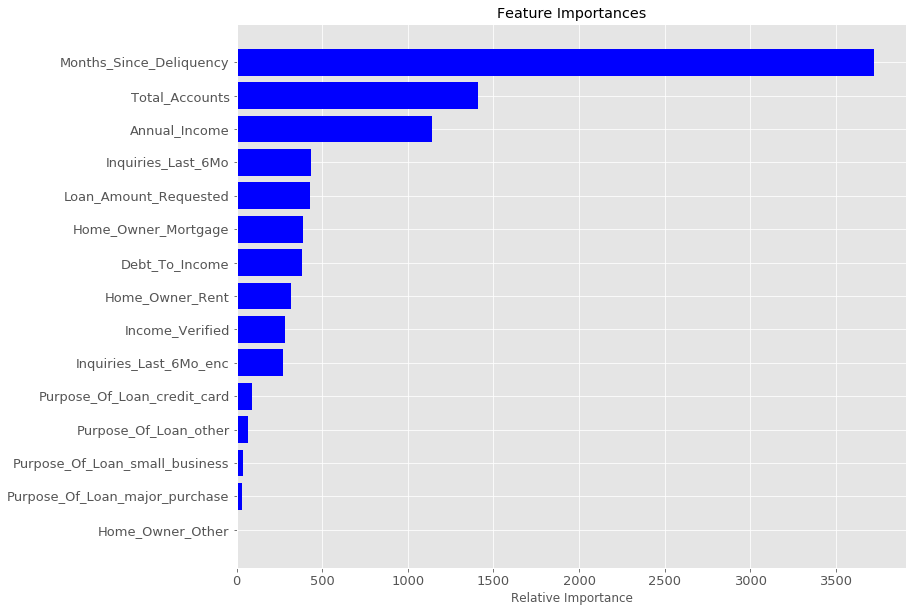

In [25]:
features=X.columns
importances =lgbm.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [26]:
Xt

,Unnamed: 0,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Home_Owner_Mortgage,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent,Purpose_Of_Loan_car,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_debt_consolidation,Purpose_Of_Loan_educational,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_enc,Income_Verified_enc,Inquiries_Last_6Mo_enc,Gender_freq,income_freq,enq_freq
0,0,10164310.00,27500.00,11.00,129000.00,1.00,12.87,0.00,68.00,10.00,37.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,2.26,2.03,0.71,0.36,0.52
1,1,10164311.00,26000.00,11.00,110000.00,0.00,11.37,0.00,33.15,6.00,23.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,1.94,2.03,0.71,0.64,0.52
2,2,10164312.00,6075.00,1.00,75000.00,1.00,6.83,2.00,37.32,5.00,20.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,2.26,2.35,0.71,0.36,0.13
3,3,10164313.00,12000.00,11.00,73000.00,0.00,7.76,0.00,34.08,6.00,8.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,1.94,2.03,0.71,0.64,0.52
4,4,10164314.00,35000.00,1.00,156000.00,0.00,9.62,0.00,26.00,9.00,21.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,1.94,2.03,0.71,0.64,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109536,109536,10273846.00,15000.00,9.00,120000.00,1.00,8.15,2.00,32.00,13.00,57.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2.16,2.26,2.35,0.71,0.36,0.13
109537,109537,10273847.00,9600.00,11.00,125000.00,0.00,9.08,1.00,17.00,9.00,34.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,1.94,2.24,0.71,0.64,0.28
109538,109538,10273848.00,2000.00,5.00,37850.00,0.00,11.60,0.00,36.65,10.00,11.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,1.94,2.03,0.71,0.64,0.52
109539,109539,10273849.00,2125.00,6.00,30000.00,0.00,24.88,0.00,37.50,5.00,6.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2.16,1.94,2.03,0.71,0.64,0.52


In [27]:
id_cols=Xt['Loan_ID']

In [28]:
Xt.drop(['Unnamed: 0','Loan_ID'],1,inplace=True)

In [29]:
Xt

,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Home_Owner_Mortgage,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent,Purpose_Of_Loan_car,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_debt_consolidation,Purpose_Of_Loan_educational,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_enc,Income_Verified_enc,Inquiries_Last_6Mo_enc,Gender_freq,income_freq,enq_freq
0,27500.00,11.00,129000.00,1.00,12.87,0.00,68.00,10.00,37.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,2.26,2.03,0.71,0.36,0.52
1,26000.00,11.00,110000.00,0.00,11.37,0.00,33.15,6.00,23.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,1.94,2.03,0.71,0.64,0.52
2,6075.00,1.00,75000.00,1.00,6.83,2.00,37.32,5.00,20.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,2.26,2.35,0.71,0.36,0.13
3,12000.00,11.00,73000.00,0.00,7.76,0.00,34.08,6.00,8.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,1.94,2.03,0.71,0.64,0.52
4,35000.00,1.00,156000.00,0.00,9.62,0.00,26.00,9.00,21.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,1.94,2.03,0.71,0.64,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109536,15000.00,9.00,120000.00,1.00,8.15,2.00,32.00,13.00,57.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2.16,2.26,2.35,0.71,0.36,0.13
109537,9600.00,11.00,125000.00,0.00,9.08,1.00,17.00,9.00,34.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,1.94,2.24,0.71,0.64,0.28
109538,2000.00,5.00,37850.00,0.00,11.60,0.00,36.65,10.00,11.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,1.94,2.03,0.71,0.64,0.52
109539,2125.00,6.00,30000.00,0.00,24.88,0.00,37.50,5.00,6.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2.16,1.94,2.03,0.71,0.64,0.52


In [40]:
Xt=Xt
y_pred=xgb.predict(Xt)

In [41]:
A=y_pred

In [42]:
A=pd.DataFrame(A)

In [43]:
A.columns=['Interest_Rate']

In [44]:
A

,Interest_Rate
0,1.00
1,3.00
2,1.00
3,1.00
4,3.00
...,...
109536,1.00
109537,1.00
109538,1.00
109539,2.00


In [45]:
file=pd.concat([id_cols,A],1)

In [47]:
file.to_csv('log_baseline.csv')